In [23]:
%load_ext autoreload
%autoreload 2
from trade.assets.OptionStructure import OptionStructure
from trade.assets.helpers.loaders import create_object_from_id
from trade.helpers.Context import Context
from trade.assets.Calculate import Calculate
import yfinance as yf   
import pandas as pd
import numpy as np
from trade.assets.Stock import Stock
from pandas.tseries.offsets import BDay
from trade.assets.Option import Option
import threading
import time
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
create_object_from_id?

Signature:
create_object_from_id(
    option_id: str,
    date: str = '2025-02-26',
    run_chain: bool = False,
    default_fill: str = 'midpoint',
    **kwargs,
)
Docstring:
return an Option object from an option id, or an OptionStructure object from a structure id

Args:
option_id: str: the option id to create an object from
date: str: the date to use for the option object build date
run_chain: bool: whether to run the chain for the option object

Returns:
Option or OptionStructure: the object created from the option id
File:      ~/cloned_repos/QuantTools/trade/assets/helpers/loaders.py
Type:      function

In [3]:
Option.clear_instances()

In [4]:
# aapl = Stock('AAPL')
with Context(end_date = '2023-02-15'):
    nvda = Stock('NVDA')
# ts = aapl.spot(ts = True, spot_type = 'chain_price')
# ts
no_chain = nvda.spot(ts = False, spot_type = 'chain_price')
chain = nvda.spot(ts = False, spot_type = 'close')
no_chain, chain

Saving to cache from db
Updating db rates data


({Timestamp('2023-02-15 16:00:00'): 227.63999938964844},
 {Timestamp('2023-02-15 16:00:00'): 22.763999938964844})

In [5]:
with Context(end_date = '2025-02-21'):
    option = Option('NVDA',  300.0, '2027-01-15', 'c', run_chain = False)

In [6]:
Calculate.attribution(option, method = 'GB')

Start: 2024-02-19 09:30:00, End: 2025-02-25 16:00:00, ts_start: 2024-02-21 09:30:00, ts_end: 2025-02-21 16:00:00


,Delta_PnL,Gamma_PnL,Theta_PnL,Vega_PnL,Rho_PnL,Total,Unexplained,Actual_PnL,Price
Datetime,,,,,,,,,
2025-01-07,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1335.0
2025-01-08,-0.868180,0.000150,-2.692931,-41.792080,0.110041,-45.243001,0.243001,-45.0,1290.0
2025-01-09,0.000000,0.000000,-2.639710,0.000000,0.000000,-2.639710,2.639710,0.0,1290.0
2025-01-10,-119.160085,2.941274,-2.639710,-9.707424,0.433844,-128.132101,-1.867899,-130.0,1160.0
2025-01-13,-71.764667,1.205050,-7.440157,-20.371628,0.249707,-98.121696,1.121696,-97.0,1063.0
2025-01-14,-37.478781,0.363673,-2.357763,0.680291,-0.234090,-39.026669,0.026669,-39.0,1024.0
2025-01-15,111.868108,3.379772,-2.305877,-43.908053,-0.363173,68.670776,-2.670776,66.0,1090.0
2025-01-16,-68.853408,1.199198,-2.399018,52.099147,-0.484791,-18.438872,-1.561128,-20.0,1070.0
2025-01-17,105.888620,2.881807,-2.375316,-43.929391,-0.093766,62.371953,-2.371953,60.0,1130.0


In [7]:
from dbase.DataAPI.ThetaData import list_contracts
list_contracts('NVDA', start_date = '2025-02-18')

,root,expiration,strike,right
0,NVDA,20250221,87.0,P
1,NVDA,20250919,215.0,C
2,NVDA,20250919,84.0,P
3,NVDA,20250321,218.0,C
4,NVDA,20260618,80.0,C
...,...,...,...,...
3066,NVDA,20270115,75.0,P
3067,NVDA,20260116,212.0,C
3068,NVDA,20260116,81.0,P
3069,NVDA,20261218,76.0,C


In [8]:
with Context(end_date = '2025-02-18'):
    option = Option('NVDA',  212.0, '2026-01-16', 'c', run_chain = False)

In [9]:
option.spot(ts = True, ts_start = '2025-01-24', ts_end = '2025-01-31')

,Open,High,Low,Close,Midpoint,Volume
Datetime,,,,,,
2025-01-24,0.0,0.00,0.00,0.00,10.475,0
2025-01-27,7.1,7.10,5.30,5.75,5.675,27
2025-01-28,5.6,7.39,5.60,7.39,7.450,4
2025-01-29,6.9,6.90,6.23,6.40,6.825,3
2025-01-30,6.6,6.80,6.60,6.80,7.175,2
2025-01-31,7.5,7.60,6.25,6.25,6.325,3


In [10]:
# greeks = Calculate.greeks(option)
# pct_slides = Calculate.pct_spot_slides(option)
vol_slides = Calculate.pct_vol_slides(option)
# greeks

In [11]:
option.sigma, option.pv

(0.490366933998826, 9.100000000000001)

In [12]:
yf.__version__
display(threading.active_count())
display(threading.enumerate())

8

[<_MainThread(MainThread, started 140704397355776)>,
 <Thread(IOPub, started daemon 123145498796032)>,
 <Heartbeat(Heartbeat, started daemon 123145515585536)>,
 <Thread(Thread-1 (_watch_pipe_fd), started daemon 123145533448192)>,
 <Thread(Thread-2 (_watch_pipe_fd), started daemon 123145550237696)>,
 <ControlThread(Control, started daemon 123145567027200)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 123145583816704)>,
 <Consumer(Thread-4, started daemon 123145601142784)>]

In [13]:
def _create_object_from_id(*args ,**kwargs):
    try:
        return create_object_from_id(*args, **kwargs)
    except Exception as e:
        print(e)
        print(kwargs, args)
        return None

## Import Trades

In [14]:
trades = pd.read_csv('/Users/chiemelienwanisobi/cloned_repos/QuantTools/EventDriven/output/profitable_trades_options.csv').iloc[:, 1:]
trades = trades
trades

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions
0,TSLA,-469.319634,200.595187,157.929765,-21.269414,11,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340
1,AAPL,1.565517,200.443306,200.704226,0.130171,6,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240
2,MSFT,-276.544545,200.353116,160.846753,-19.718367,7,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375
3,AMZN,-43.770957,200.305228,156.534271,-21.852129,1,2023-07-05,2023-10-25,112,&L:AMZN20240621C165&S:AMZN20240621C175
4,NVDA,25078.793707,190.955251,2977.487885,1459.259494,9,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800
5,BA,-30.225169,185.573604,155.348435,-16.287429,1,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310
6,WMT,0.000000,NaN,NaN,NaN,0,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180
7,TSLA,-43.298192,200.384529,195.573618,-2.400839,9,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315
8,AAPL,-298.098050,199.060910,149.377901,-24.958697,6,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310
9,INTC,0.000000,NaN,NaN,NaN,0,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45


In [15]:
# Stock
Option.clear_instances()
# Option.list_instances()


In [16]:
structure = _create_object_from_id(trades.iloc[3]['Positions'], trades.iloc[3]['EntryTime'])

In [17]:
trades['Structure'] = None
trades[trades.Structure.isna()]

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions,Structure
0,TSLA,-469.319634,200.595187,157.929765,-21.269414,11,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340,None
1,AAPL,1.565517,200.443306,200.704226,0.130171,6,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240,None
2,MSFT,-276.544545,200.353116,160.846753,-19.718367,7,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375,None
3,AMZN,-43.770957,200.305228,156.534271,-21.852129,1,2023-07-05,2023-10-25,112,&L:AMZN20240621C165&S:AMZN20240621C175,None
4,NVDA,25078.793707,190.955251,2977.487885,1459.259494,9,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800,None
5,BA,-30.225169,185.573604,155.348435,-16.287429,1,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310,None
6,WMT,0.000000,NaN,NaN,NaN,0,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180,None
7,TSLA,-43.298192,200.384529,195.573618,-2.400839,9,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315,None
8,AAPL,-298.098050,199.060910,149.377901,-24.958697,6,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310,None
9,INTC,0.000000,NaN,NaN,NaN,0,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45,None


In [18]:
att = Calculate.attribution(structure.Structure['long'][0], ts_end = '2023-07-12', method = 'RV', return_both_data = True)
att

Start: 2022-07-01 09:30:00, End: 2023-07-14 00:00:00, ts_start: 2022-07-05 09:30:00, ts_end: 2023-07-12


(      Datetime  Option_Close  Midpoint     Bs_iv  Midpoint_bs_iv  Stock_Close  \
 1   2022-07-06        10.525    10.525  0.364095        0.364095   114.330002   
 2   2022-07-07        10.750    10.975  0.356311        0.360025   116.330002   
 3   2022-07-08        10.550    10.700  0.357963        0.360469   115.540001   
 4   2022-07-11         9.900     9.500  0.368822        0.361757   111.750000   
 5   2022-07-12         8.800     9.350  0.362617        0.372713   109.220001   
 ..         ...           ...       ...       ...             ...          ...   
 262 2023-07-06         6.350     6.225  0.305476        0.302621   128.360001   
 263 2023-07-07         7.000     6.725  0.310722        0.304641   129.779999   
 264 2023-07-10         5.950     6.000  0.306709        0.307887   127.129997   
 265 2023-07-11         6.200     6.325  0.301651        0.304515   128.779999   
 266 2023-07-12         6.350     6.875  0.291797        0.303439   130.800003   
 
      RF_rate 

In [84]:
class EVBAttributor:
    """
    Class to load data from Event Driven Backtester and calculate PnL and Greeks
    """
    def __init__(self, 
                 trades: pd.DataFrame, 
                 attribution_fill: str = 'default_fill',
                 option_fill: str = 'midpoint',
                 retries: int = 3):
        """
        trades: DataFrame containing trades data from Event Driven Backtester
            Eexpected columns: EntryTime, ExitTime, Quantity, Positions
        retries: Number of retries for each trade
        attribution_fill: Method to fill missing data in attribution calculation
        option_fill: Method to fill missing data in option class. Default is midpoint
        """
        assert 'EntryTime' in trades.columns, 'EntryTime column not found'
        assert 'ExitTime' in trades.columns, 'ExitTime column not found'
        assert 'Quantity' in trades.columns, 'Quantity column not found'
        assert 'Positions' in trades.columns, 'Positions column not found'

        self.trades = trades
        self.trades['Structure'] = None
        self.retries = retries
        self.stored_data = {
            'attribution': {},
            'greeks': {},
            'vol_slides': {},
            'pct_spot_slides': {}
        }
        self.attribution_fill = attribution_fill
        self.option_fill = option_fill

    def _create_object_from_id(self, *args ,**kwargs):
        try:
            return create_object_from_id(*args, **kwargs)
        except Exception as e:
            print(e)
            print(kwargs, args)
            return None
    
    def load_data(self, 
                  attribution: bool = True, 
                  greeks: bool = True, 
                  attribution_method: str = 'RV', 
                  print_output: bool = True) -> None:
        
        """
        Load data from trades DataFrame and calculate PnL and Greeks

        params:
        attribution: bool - Calculate attribution data if True
        greeks: bool - Calculate greeks data if True
        attribution_method: str - Method to calculate attribution data. available methods are 'RV', 'GB'
        print_output: bool - Print output if True

        return: None
        use self.attribution and self.greeks to access the calculated data
        """
        trades = self.trades
        
        date_range = pd.date_range(trades['EntryTime'].min(), trades['ExitTime'].max(), freq = 'B')
        tries = 0
        failed = ['start'] ## Making sure the loop runs at least once
        ## Load Data
        while len(failed) > 0 :
            if tries >= self.retries:
                print(f"Retries exceeded for {failed}")
                break
            tries += 1
            for index in trades[trades.Structure.isna()].index:
                clear_output(wait=True)
                print(f"Starting {index}") if print_output else None
                start = (pd.to_datetime(trades.loc[index]['EntryTime']) + BDay(1)).strftime('%Y-%m-%d') ## Calculate PnL from the day after trade entry. This replicates buy at close and sell at open
                end = (pd.to_datetime(trades.loc[index]['ExitTime']) - BDay(1)).strftime('%Y-%m-%d') ## Temp fix for trades enddate issue
                quantity = trades.loc[index]['Quantity']
                id = trades.loc[index]['Positions']
                structure = self._create_object_from_id(id, start, default_fill = self.option_fill)
                
                ## Create PnL and Greeks Data from structure object
                if structure is not None:
                    if attribution:
                        pnl = Calculate.attribution(structure, start, end, method = attribution_method, replace = self.attribution_fill) * quantity
                        self.stored_data['attribution'][index] = pnl
                    if greeks:
                        greeks_data = structure.greeks('greek', ts_start = start, ts_end = end) * quantity * 100
                        self.stored_data['greeks'][index] = greeks_data
                else:
                    trades.loc[index, 'Structure'] = None
                    print(f"Failed to load {index}") if print_output else None
                    self.stored_data['attribution'][index] = 0
                    self.stored_data['greeks'][index] = 0
                    continue



                trades.loc[index, 'Structure'] = structure
                print(f"Completed {index}") if print_output else None
                

            ## Produce Empty DataFrames based on Date Range from Trades Entry to Exit
            ## Columns off the DataFrames are based on the first successful attribution and greeks data
            for ind in self.stored_data['attribution'].keys():
                if isinstance(self.stored_data['attribution'][ind], pd.DataFrame):
                    pnl_sample = self.stored_data['attribution'][ind].copy()
                    greeks_sample = self.stored_data['greeks'][ind].copy()
            
            attribution = pd.DataFrame(index = date_range,

                        data = {x: [0] * len(date_range) for  x in pnl_sample.columns})
            
            pt_greeks = pd.DataFrame(index = date_range,
                                data = {x: [0] * len(date_range) for  x in greeks_sample.columns})
            
            pct_spot_slides = pd.DataFrame(index = date_range,
                                data = {x: [0] * len(date_range) for  x in greeks_sample.columns})
            
            vol_slides = pd.DataFrame(index = date_range,
                                data = {x: [0] * len(date_range) for  x in greeks_sample.columns})
                

            ## Fill DataFrames with PnL and Greeks Data
            ## This is done by adding the pnl and greeks data to the corresponding columns in the dataframes
            failed = []
            for index, pnl in self.stored_data['attribution'].items():
                if not isinstance(pnl, pd.DataFrame):
                    print(f"{index} failed") if print_output else None
                    failed.append(index)
                    continue
                days_mask = attribution.index.isin(pnl.index)
                attribution.loc[days_mask, :] += pnl
                attribution.fillna(0, inplace=True)
                
            for index, greeks in self.stored_data['greeks'].items():
                days_mask = pt_greeks.index.isin(greeks.index)
                pt_greeks.loc[days_mask, :] += greeks
                pt_greeks.fillna(0, inplace=True)

            self.attribution = attribution
            self.greeks = pt_greeks
                        

            


In [91]:
attributor = EVBAttributor(trades)
attributor.load_data(attribution = True, greeks = True, print_output = True)

Starting 25
Completed 25ble dataing available data


In [95]:
attributor.attribution.sum().round(2)

Delta_PnL            29225.88
Gamma_PnL            -2650.29
Vega_PnL             -2072.70
Volga_PnL             2836.56
Theta_PnL             1118.84
Rho_PnL                 15.27
Vanna_PnL             -517.27
Dividend_PnL             0.00
Total_PnL            27956.29
Unexplained_PnL       -111.29
Actual_PnL           27845.00
Price              3070427.50
dtype: float64

In [93]:
attributor.trades.PnL.sum()

27888.826867781576

In [18]:
stored_data = {
    'greek': {},
    'attribution': {}
}

## Make a class
## Produce Scenario Analysis
## Add Retry to the class

In [19]:


## Make sure to clear the variables before running this cell
try:
    del attribution, greeks
except:
    pass

## Produce date range, serves as the index for the attribution and greeks dataframes
date_range = pd.date_range(trades.EntryTime.min(), trades.ExitTime.max(), freq='B')


## Loop through the trades dataframe and calculate the attribution and greeks for each trade
## And store the results in the attribution and greeks dataframes as a time series
for index in trades[trades.Structure.isna()].index:
    clear_output(wait=True)
    print(f"Starting {index}")
    start = trades.loc[index]['EntryTime']
    end = (pd.to_datetime(trades.loc[index]['ExitTime']) - BDay(1)).strftime('%Y-%m-%d')
    if index == 4:
        end = '2024-06-07'
    quantity = trades.loc[index]['Quantity']
    id = trades.loc[index]['Positions']
    # trades.loc[index]
    structure = _create_object_from_id(id, start)
    
    if structure is not None:

        try:
            pnl = Calculate.attribution(structure, start, end, method = 'RV', replace = 'default_fill') * quantity
            greeks = structure.greeks('greek', start, end) * quantity * 100
            attribution += pnl
            pt_greeks += greeks

        except NameError as e:
            attribution = pd.DataFrame(index = date_range,
                                data = {x: [0] * len(date_range) for  x in pnl.columns})
            pt_greeks = pd.DataFrame(index = date_range,
                                data = {x: [0] * len(date_range) for  x in greeks.columns})
        
            attribution += pnl
            pt_greeks += greeks
        
        except TypeError as j:
            trades.loc[index, 'Structure'] = None
            print(f"{index} failed")
            continue
    
    stored_data['attribution'][index] = pnl
    stored_data['greek'][index] = greeks
            
    attribution.fillna(0, inplace=True)
    pt_greeks.fillna(0, inplace=True)
    # time.sleep(20) ## Relax, we are not in a hurry
    trades.loc[index, 'Structure'] = structure
    print(f"{index} done") if structure is not None else print(f"{index} failed")



Starting 25
Start: 2024-05-17 00:00:00, End: 2024-07-02 00:00:00, ts_start: 2024-05-21, ts_end: 2024-06-28
Start: 2024-05-17 00:00:00, End: 2024-07-02 00:00:00, ts_start: 2024-05-21, ts_end: 2024-06-28
Start: 2024-05-17 00:00:00, End: 2024-07-02 00:00:00, ts_start: 2024-05-21, ts_end: 2024-06-28
25 donevailable dataing available data


In [20]:
trades#.loc[failed, 'Structure'] = None
trades

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions,Structure
0,TSLA,-469.319634,200.595187,157.929765,-21.269414,11,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340,"CallVertical(TSLA, Build On: 2023-07-05 16:00:00)"
1,AAPL,1.565517,200.443306,200.704226,0.130171,6,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240,"CallVertical(AAPL, Build On: 2023-07-05 16:00:00)"
2,MSFT,-276.544545,200.353116,160.846753,-19.718367,7,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375,"CallVertical(MSFT, Build On: 2023-07-05 16:00:00)"
3,AMZN,-43.770957,200.305228,156.534271,-21.852129,1,2023-07-05,2023-10-25,112,&L:AMZN20240621C165&S:AMZN20240621C175,"CallVertical(AMZN, Build On: 2023-07-05 16:00:00)"
4,NVDA,25078.793707,190.955251,2977.487885,1459.259494,9,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800,"CallVertical(NVDA, Build On: 2023-07-05 16:00:00)"
5,BA,-30.225169,185.573604,155.348435,-16.287429,1,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310,"CallVertical(BA, Build On: 2023-08-10 16:00:00)"
6,WMT,0.000000,NaN,NaN,NaN,0,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180,"CallVertical(WMT, Build On: 2023-08-10 16:00:00)"
7,TSLA,-43.298192,200.384529,195.573618,-2.400839,9,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315,"CallVertical(TSLA, Build On: 2023-08-17 16:00:00)"
8,AAPL,-298.098050,199.060910,149.377901,-24.958697,6,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310,"CallVertical(AAPL, Build On: 2023-08-31 16:00:00)"
9,INTC,0.000000,NaN,NaN,NaN,0,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45,"CallVertical(INTC, Build On: 2023-09-15 16:00:00)"


In [21]:
stored_data['attribution']

{0:              Delta_PnL  Gamma_PnL     Vega_PnL  Volga_PnL  Theta_PnL  \
 Datetime                                                               
 2023-07-05   46.313686  -0.002559     8.723780  -0.402952  -0.501017   
 2023-07-06 -103.690540  -0.016682    22.778507  -0.667192  -0.451834   
 2023-07-07  -37.202332   0.005605  -337.608264  15.448639  -0.643391   
 2023-07-10  -79.786022   0.270221    57.213318  -1.242215  -0.779639   
 2023-07-11    3.078424   0.000435   283.282279 -11.352877  -0.525344   
 2023-07-12   40.910151   0.028230    14.520843   0.213290  -0.993928   
 2023-07-13  112.088751   0.143576  -194.286526   6.776201  -1.013301   
 2023-07-14   62.631247   0.075201    23.896942  -2.596955  -0.537026   
 2023-07-17  160.440614   0.188912   346.649874 -17.218142  -1.327164   
 2023-07-18   54.903681  -0.086673  -227.674157   9.931748  -0.636723   
 2023-07-19  -37.098228  -0.021456   908.316563 -39.125865  -0.245582   
 2023-07-20 -590.316144 -17.359511 -1243.852940 

In [22]:
ind = 1
display(trades.loc[ind, :])
(stored_data['attribution'][ind].sum()).round(2)

Ticker                                                     AAPL
PnL                                                    1.565517
EntryPrice                                           200.443306
ExitPrice                                            200.704226
ReturnPct                                              0.130171
Quantity                                                      6
EntryTime                                            2023-07-05
ExitTime                                             2023-08-04
Duration                                                     30
Positions                &L:AAPL20240621C230&S:AAPL20240621C240
Structure     CallVertical(AAPL, Build On: 2023-07-05 16:00:00)
Name: 1, dtype: object

Delta_PnL            -75.82
Gamma_PnL             18.53
Vega_PnL              57.12
Volga_PnL             -9.61
Theta_PnL            -90.81
Rho_PnL                8.31
Vanna_PnL              5.73
Dividend_PnL           0.00
Total_PnL            -86.56
Unexplained_PnL       -3.44
Actual_PnL           -90.00
Price              27615.00
dtype: float64

In [23]:
pnl_sample = stored_data['attribution'][ind].copy()
greeks_sample = stored_data['greek'][ind].copy()
failed = []

In [24]:
attribution = pd.DataFrame(index = date_range,

                    data = {x: [0] * len(date_range) for  x in pnl_sample.columns})
pt_greeks = pd.DataFrame(index = date_range,
                    data = {x: [0] * len(date_range) for  x in greeks_sample.columns})

for index, pnl in stored_data['attribution'].items():
    if not isinstance(pnl, pd.DataFrame):
        print(f"{index} failed")
        failed.append(index)
        continue
    pnl_copy = pnl.copy()
    days_mask = attribution.index.isin(pnl.index)
    attribution.loc[days_mask, :] += pnl
    attribution.fillna(0, inplace=True)
    print(pnl_copy.Actual_PnL.sum(), index)
    print(attribution.Actual_PnL.max(), index)
    print(attribution.Actual_PnL.sum(), index)
    print("\n")
    
for index, greeks in stored_data['greek'].items():
    greeks_copy = greeks.copy()
    days_mask = pt_greeks.index.isin(greeks.index)
    pt_greeks.loc[days_mask, :] += greeks
    pt_greeks.fillna(0, inplace=True)
    print(f"{index} greeks")
    print(greeks_copy.Midpoint_delta.max(), index)
    print(pt_greeks.Midpoint_delta.max(), index)
    print(pt_greeks.Midpoint_delta.min(), index)
    print("\n")

-412.5000000000062 0
824.9999999999922 0
-412.50000000000614 0


-90.00000000000026 1
899.9999999999922 1
-502.5000000000066 1


-192.5 2
1407.4999999999884 2
-695.0000000000066 2


-43.99999999999986 3
1429.9999999999884 3
-739.000000000006 3


25109.99999999994 4
5557.499999999992 4
24370.999999999927 4


-52.499999999999964 5
5557.499999999992 5
24318.499999999927 5


0.0 6
5557.499999999992 6
24318.499999999927 6


-180.00000000000068 7
5557.499999999992 7
24138.499999999927 7


-270.00000000000006 8
5557.499999999992 8
23868.499999999927 8


0.0 9
5557.499999999992 9
23868.499999999927 9


257.5000000000002 10
5657.499999999992 10
24125.99999999993 10


1062.500000000004 11
5407.499999999992 11
25188.499999999938 11


-237.5000000000003 12
5407.499999999992 12
24950.999999999935 12


445.00000000000136 13
5832.499999999992 13
25395.99999999993 13


0.0 14
5832.499999999992 14
25395.99999999993 14


0.0 15
5832.499999999992 15
25395.99999999993 15


-79.00000000000001 16
5832.49999

In [25]:
failed

[]

In [26]:
trades.PnL.sum(), attribution.Actual_PnL.sum()

(27888.826867781576, 27605.999999999938)

<Axes: >

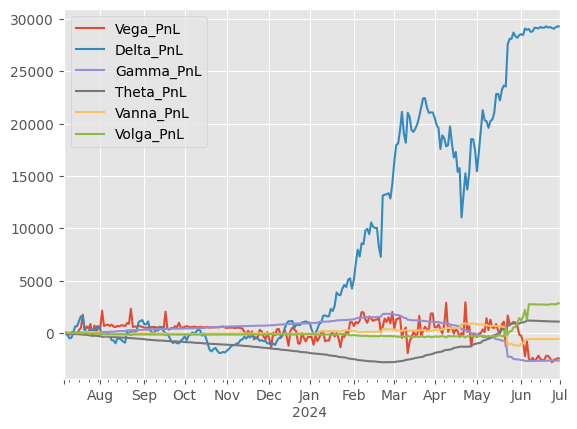

In [27]:
attribution.cumsum().plot(y = ['Vega_PnL', 'Delta_PnL', 'Gamma_PnL', 'Theta_PnL', 'Vanna_PnL', 'Volga_PnL'])

<Axes: >

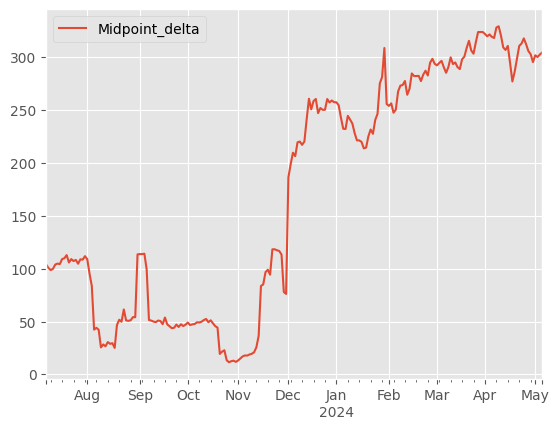

In [28]:
pt_greeks.iloc[1:-40].plot(y = 'Midpoint_delta')

In [29]:
ind = 7
end = '2024-07-01' if ind == 4 else trades.ExitTime.loc[ind]
start = trades.EntryTime.loc[ind]
structure = trades.Structure.loc[ind]
att = Calculate.attribution(structure,
                            ts_start = start,
                            ts_end = end,
                            method = 'RV',
                            return_all=True,
                            replace = 'default_fill')


Start: 2023-08-15 00:00:00, End: 2023-10-24 00:00:00, ts_start: 2023-08-17, ts_end: 2023-10-20
Start: 2023-08-15 00:00:00, End: 2023-10-24 00:00:00, ts_start: 2023-08-17, ts_end: 2023-10-20
Start: 2023-08-15 00:00:00, End: 2023-10-24 00:00:00, ts_start: 2023-08-17, ts_end: 2023-10-20


In [30]:
pd.set_option.float_format = '{:.2f}'.format
(att['total'].iloc[:-1].sum() * 9).round(2)

Delta_PnL            -185.57
Gamma_PnL              20.03
Vega_PnL              143.00
Volga_PnL             -10.62
Theta_PnL             -62.43
Rho_PnL                 0.81
Vanna_PnL             -83.24
Dividend_PnL            0.00
Total_PnL            -178.01
Unexplained_PnL        -1.99
Actual_PnL           -180.00
Price              120510.00
dtype: float64

In [31]:
att['total'].round(2)


,Delta_PnL,Gamma_PnL,Vega_PnL,Volga_PnL,Theta_PnL,Rho_PnL,Vanna_PnL,Dividend_PnL,Total_PnL,Unexplained_PnL,Actual_PnL,Price
Datetime,,,,,,,,,,,,
2023-08-17,-16.16,0.12,0.00,0.00,-0.16,-0.03,0.00,0.0,-16.23,1.23,-15.0,200.0
2023-08-18,-9.31,0.05,-7.34,0.26,-0.17,0.00,0.24,0.0,-16.27,-1.23,-17.5,182.5
2023-08-21,37.98,0.88,16.02,-0.71,-0.50,0.01,1.28,0.0,54.96,0.04,55.0,237.5
2023-08-22,4.94,0.01,-9.95,0.26,-0.15,0.06,-0.17,0.0,-5.01,0.01,-5.0,232.5
2023-08-23,9.19,0.02,3.42,-0.12,-0.13,0.00,0.10,0.0,12.50,0.00,12.5,245.0
2023-08-24,-17.38,0.08,5.32,-0.25,-0.13,0.03,-0.16,0.0,-12.49,-0.01,-12.5,232.5
2023-08-25,21.81,0.12,1.00,-0.15,-0.15,0.05,-0.19,0.0,22.48,0.02,22.5,255.0
2023-08-28,0.59,0.00,2.36,-0.09,-0.38,0.03,0.00,0.0,2.51,-0.01,2.5,257.5
2023-08-29,47.39,0.17,0.43,-0.09,-0.13,-0.01,-0.29,0.0,47.46,0.04,47.5,305.0


In [32]:

structure = _create_object_from_id(id, end)
structure

CallVertical(AAPL, Build On: 2023-10-20 16:00:00)

In [33]:
rt = Calculate.attribution(structure, start, end, method = 'RV', replace = 'default_fill', return_all = True)
# grt = structure.greeks('greek', '2023-11-14', '2024-07-01', return_all = True)
rt

Start: 2023-08-15 00:00:00, End: 2023-10-24 00:00:00, ts_start: 2023-08-17, ts_end: 2023-10-20
Start: 2023-08-15 00:00:00, End: 2023-10-24 00:00:00, ts_start: 2023-08-17, ts_end: 2023-10-20
Start: 2023-08-15 00:00:00, End: 2023-10-24 00:00:00, ts_start: 2023-08-17, ts_end: 2023-10-20


{'long': [             Delta_PnL  Gamma_PnL   Vega_PnL  Volga_PnL  Theta_PnL   Rho_PnL  \
  Datetime                                                                       
  2023-08-17  -95.424394   2.175902  18.311434  -0.710280  -2.259594 -0.687584   
  2023-08-18   17.442612   0.078586   7.247356  -0.280551  -2.192072  0.000000   
  2023-08-21   48.556402   0.595427  -8.305251   0.329817  -6.648348  0.187681   
  2023-08-22   50.962847   0.634130  11.438025  -0.446363  -2.253189  1.439467   
  2023-08-23  146.645544   4.944698  14.164581  -0.558737  -2.313132  0.000000   
  2023-08-24 -191.222475   7.299935   2.725695  -0.111858  -2.449952  0.858026   
  2023-08-25   83.116370   1.618543  28.446920  -1.102303  -2.304150  1.164858   
  2023-08-28   61.625467   0.803402  44.585741  -1.752159  -7.219963  0.816240   
  2023-08-29  158.601845   4.880075 -75.562684   3.289679  -2.499967 -0.315829   
  2023-08-30  148.879695   4.017569   1.064303  -0.044685  -2.552835 -0.562531   
  2023-0

In [34]:
rt['total'].iloc[:-1, :-1].sum() * quantity

Delta_PnL         -11.790617
Gamma_PnL           4.042348
Vega_PnL           21.089885
Volga_PnL          -0.343042
Theta_PnL         -27.484506
Rho_PnL             0.707536
Vanna_PnL           3.773689
Dividend_PnL        0.000000
Total_PnL         -10.004708
Unexplained_PnL     0.004708
Actual_PnL        -10.000000
dtype: float64

In [35]:
structure.spot(ts = True, ts_start = start, ts_end = end, return_all = False)

,Open,High,Low,Close,Midpoint,Volume
Datetime,,,,,,
2023-08-17,1.55,1.55,1.70,1.70,1.300,-8
2023-08-18,1.74,1.16,1.74,1.14,1.250,-8
2023-08-21,0.00,0.00,0.00,0.00,1.275,0
2023-08-22,1.30,1.45,1.30,1.45,1.400,1
2023-08-23,2.25,2.25,2.02,2.02,1.600,20
2023-08-24,0.00,0.00,0.00,0.00,1.075,0
2023-08-25,13.00,13.30,13.00,13.10,1.600,25
2023-08-28,-12.34,-12.34,-12.34,-12.34,1.975,-1
2023-08-29,1.47,1.25,1.47,1.25,1.425,-8


In [36]:
(grt['total']*100).plot(y = 'Midpoint_delta')

NameError: name 'grt' is not defined

In [212]:
grt['long'][0]*100

,Delta,Gamma,Theta,Rho,Vega,Vanna,Volga,Midpoint_delta,Midpoint_gamma,Midpoint_theta,Midpoint_rho,Midpoint_vega,Midpoint_vanna,Midpoint_volga
Datetime,,,,,,,,,,,,,,
2023-11-14,52.559271,0.405525,-6.665496,174.847125,153.414627,39.450651,-1149.294112,52.564096,0.405257,-6.668423,174.839269,153.413221,39.438846,-1150.825278
2023-11-15,51.995544,0.398194,-6.615940,171.830319,152.755687,41.574112,-1024.813631,51.985227,0.398712,-6.610056,171.843350,152.758222,41.602626,-1021.293842
2023-11-16,54.887194,0.394517,-6.852899,183.353007,154.506887,28.304318,-1495.911306,54.902246,0.393336,-6.866067,183.289026,154.498920,28.314661,-1500.739961
2023-11-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.280291,0.405032,-6.679414,172.447980,152.719716,40.560585,-1068.213245
2023-11-20,55.207672,0.402129,-6.826058,183.907490,154.098498,25.844715,-1445.240929,55.453664,0.381228,-7.062921,182.685084,153.957906,26.252212,-1532.893757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,82.569341,0.311637,-9.422345,146.607857,80.026553,-245.196985,73278.138003,82.084181,0.309366,-9.641291,145.278732,81.464096,-230.423674,67486.408612
2024-06-26,82.884716,0.306381,-9.439657,146.465997,79.076598,-248.642658,75271.662173,82.603906,0.305220,-9.566382,145.702640,79.922980,-239.935269,71793.191775
2024-06-27,81.249485,0.294854,-10.327622,141.055924,83.768133,-197.765678,55847.057911,82.611303,0.301840,-9.657071,144.823955,79.805421,-236.564036,70708.953815


<Axes: xlabel='Datetime'>

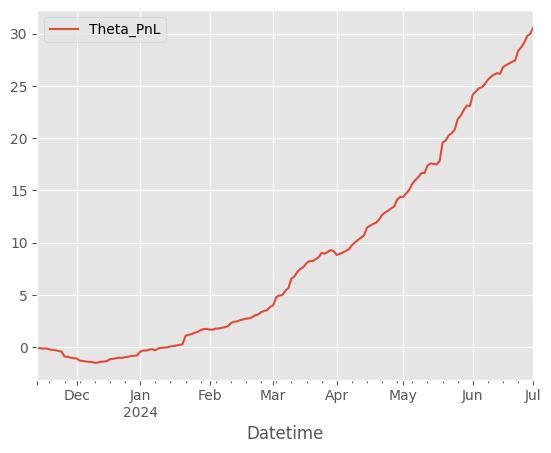

In [183]:
rt['total'].cumsum().plot(y = 'Theta_PnL')

In [151]:
structure.spot(ts = True, ts_start = '2023-07-05')

,Open,High,Low,Close,Midpoint,Volume
Datetime,,,,,,
2023-07-05,2.40,2.40,2.75,2.37,2.000,21
2023-07-06,1.11,0.73,2.74,1.26,1.925,-28
2023-07-07,0.80,0.80,3.20,2.80,1.600,-65
2023-07-10,1.80,0.98,2.17,1.70,1.575,8
2023-07-11,1.50,0.60,2.40,1.30,1.825,-33
2023-07-12,-35.02,-35.02,-33.54,-33.55,1.875,-31
2023-07-13,3.60,2.07,3.60,2.07,1.800,2
2023-07-14,3.25,-1.33,3.25,1.22,1.875,-35
2023-07-17,2.81,1.24,2.55,3.46,2.325,-34


In [45]:
# pnl

# attribution
# pt_greeks
# attribution += pnl
# # pnl
pt_greeks
attribution[attribution.Total_PnL != 0 ]/quantity

,Delta_PnL,Gamma_PnL,Vega_PnL,Volga_PnL,Theta_PnL,Rho_PnL,Vanna_PnL,Dividend_PnL,Total_PnL,Unexplained_PnL,Actual_PnL,Price
2023-07-07,100.197319,-0.642561,94.109883,-3.992267,9.169878,0.000000,-0.791742,0.0,198.050510,-0.228027,197.822483,-3859.441764
2023-07-10,223.900381,-3.441802,157.605718,-6.688296,26.883864,-1.045598,-3.277107,0.0,393.937159,-1.305178,392.631981,-3661.619281
2023-07-11,-7.955254,-0.004992,26.812441,-1.101267,8.526938,-1.479593,0.022497,0.0,24.820769,-0.029326,24.791443,-3268.987299
2023-07-12,-96.992218,-0.748394,18.898604,-0.774177,8.507393,1.065889,0.192337,0.0,-69.850565,0.092523,-69.758042,-3244.195856
2023-07-13,-263.728899,-5.376353,-3.222359,0.131849,8.586708,0.583759,-0.083392,0.0,-263.108687,0.305369,-262.803318,-3313.953898
2023-07-14,-161.480329,-1.838722,-107.115073,4.395554,8.868717,0.702534,-1.482306,0.0,-257.949624,0.331414,-257.618211,-3576.757216
2023-07-17,-430.417749,-11.883335,40.176855,-1.697913,27.593970,-1.627845,1.292310,0.0,-376.563707,0.826231,-375.737476,-3834.375426
2023-07-18,-148.632423,-1.269861,-161.440365,6.948718,9.538938,-1.449220,-1.500639,0.0,-297.804852,0.311053,-297.493799,-4210.112902
2023-07-19,107.200166,-0.607747,-81.851616,3.589318,9.895869,0.295669,0.516016,0.0,39.037676,0.026752,39.064429,-4507.606702
2023-07-20,1451.033987,-115.805471,204.821360,-8.928365,9.940024,0.193222,-22.238678,0.0,1519.016078,-1.615819,1517.400259,-4468.542273


In [43]:
trades

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions,Structure
0,TSLA,-2435.488156,200.386768,158.395593,-20.955064,58,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340,"CallVertical(TSLA, Build On: 2023-08-02 16:00:00)"
1,AAPL,-2.688171,200.843021,200.761561,-0.040559,33,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240,"CallVertical(AAPL, Build On: 2023-08-04 16:00:00)"
2,MSFT,-1405.469374,200.989909,160.833641,-19.979246,35,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375,"CallVertical(MSFT, Build On: 2023-08-09 16:00:00)"
3,AMZN,-433.030018,200.892755,152.778308,-23.950314,9,2023-07-05,2023-10-25,112,&L:AMZN20240621C170&S:AMZN20240621C182.5,"CallVertical(AMZN, Build On: 2023-10-25 16:00:00)"
4,NVDA,133674.653341,190.394173,2975.282784,1462.696347,48,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800,"CallVertical(NVDA, Build On: 2023-07-05 16:00:00)"
5,BA,-240.652620,185.467519,155.385942,-16.219324,8,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310,"CallVertical(BA, Build On: 2023-08-10 16:00:00)"
6,WMT,2.122548,175.943801,178.066349,1.206379,1,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180,"CallVertical(WMT, Build On: 2023-08-17 16:00:00)"
7,TSLA,-221.844005,200.276447,195.556361,-2.356785,47,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315,"CallVertical(TSLA, Build On: 2023-10-20 16:00:00)"
8,AAPL,-1682.755271,199.079386,149.586584,-24.860837,34,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310,"CallVertical(AAPL, Build On: 2023-09-07 16:00:00)"
9,INTC,-25.909441,177.260283,151.350843,-14.616608,1,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45,"CallVertical(INTC, Build On: 2023-09-20 16:00:00)"


In [ ]:
threading.active_count()

<Axes: xlabel='Datetime'>

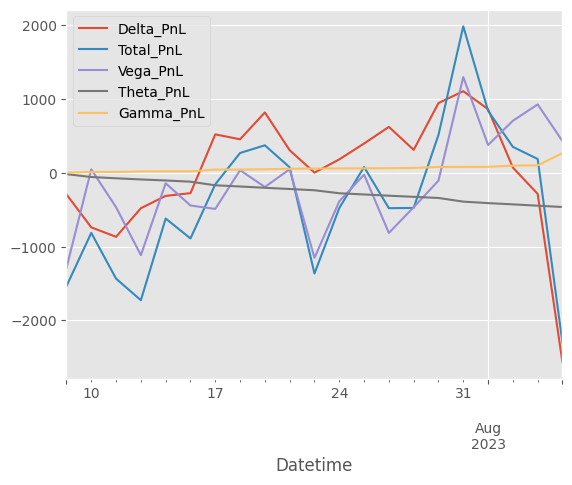

In [48]:
attribution = pnl.copy() * quantity
attribution.cumsum().plot(y = ['Delta_PnL', 'Total_PnL', 'Vega_PnL', 'Theta_PnL', 'Gamma_PnL'])